<a href="https://colab.research.google.com/github/rachidboukhoudmi/Stock_Price_Prediction.ipynb/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [2]:
!kaggle datasets download -d meetnagadia/apple-stock-price-from-19802021

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021
License(s): ODbL-1.0
100% 206k/206k [00:00<00:00, 740kB/s]
100% 206k/206k [00:00<00:00, 740kB/s]


In [3]:
from zipfile import ZipFile

file_name = "/content/apple-stock-price-from-19802021.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [8]:
df.shape

(10468, 7)

In [9]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

print('Minimum date value : {}'.format(df['Date'].min()))
print('Maximum date value : {}'.format(df['Date'].max()))

Minimum date value : 1980-12-12 00:00:00
Maximum date value : 2022-06-17 00:00:00


Text(0.5, 1.0, 'Appel Stock value changes since 1980')

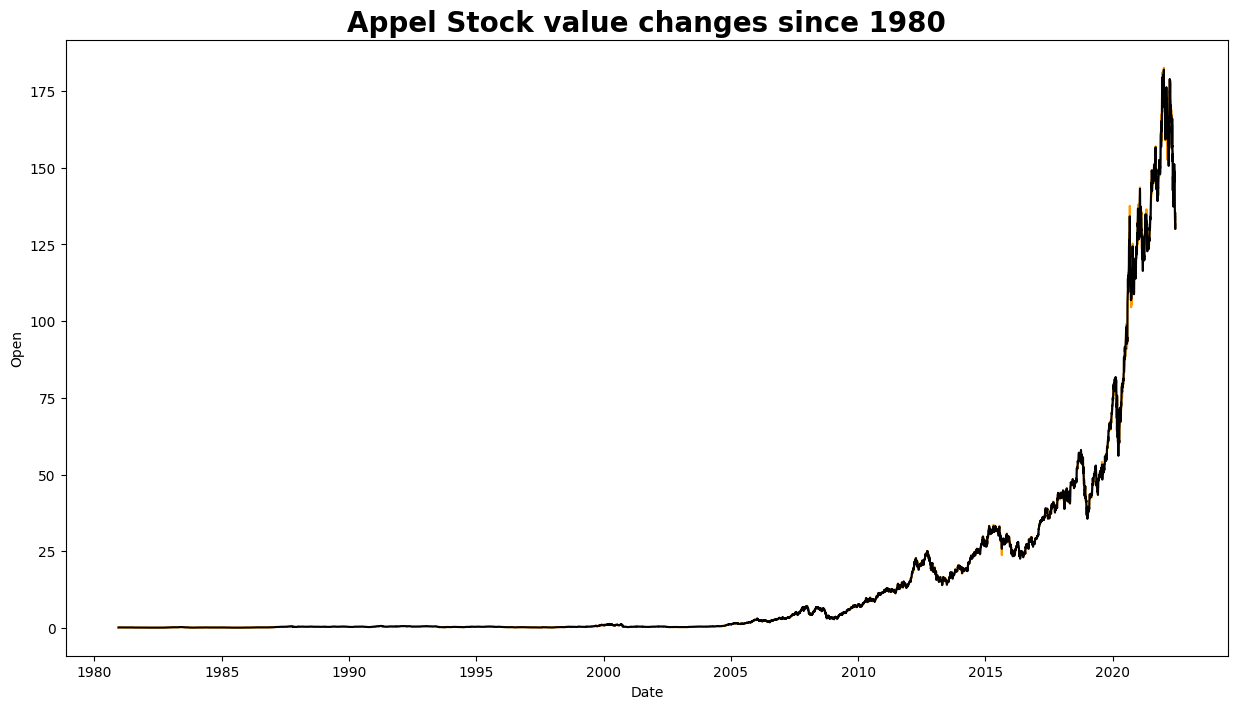

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

colors = ['#FF9900','#000000']

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(data = df , x ='Date' , y= 'Open' , color = colors[0])
ax = sns.lineplot(data = df , x ='Date' , y = 'Close' , color = colors[1] )

plt.title("Appel Stock value changes since 1980", size = 20 , weight = 'bold')


In [16]:
df.corr()['Close']

,Close
Date,0.644475
Open,0.999850
High,0.999924
Low,0.999928
Close,1.000000
Adj Close,0.999671
Volume,-0.196411


<Axes: >

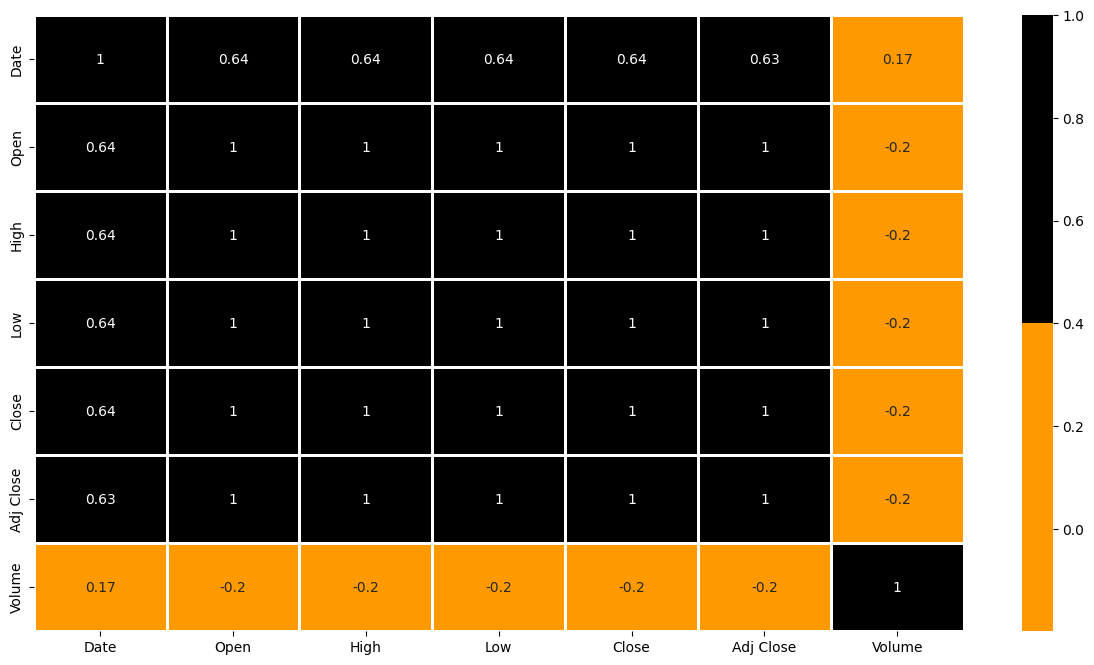

In [17]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True , cmap = [colors[0],colors[1]], linecolor = 'white' , linewidth = 2)

# **Train and Test Split**

In [18]:
x = df[['Volume','Open','High','Low']] # Use a list of column names within square brackets
y = df['Close']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# **Normalizing the values**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Model selection**

In [20]:
# basic linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn import set_config

model = LinearRegression()
model.fit(x_train, y_train)
set_config(display='diagram')
pred = model.predict(x_test)

mse = np.round(mean_squared_error(y_test,pred),2)
mae = np.round(mean_absolute_error(y_test,pred),2)


Text(8000, 550, 'Mean squared error : 0.07')

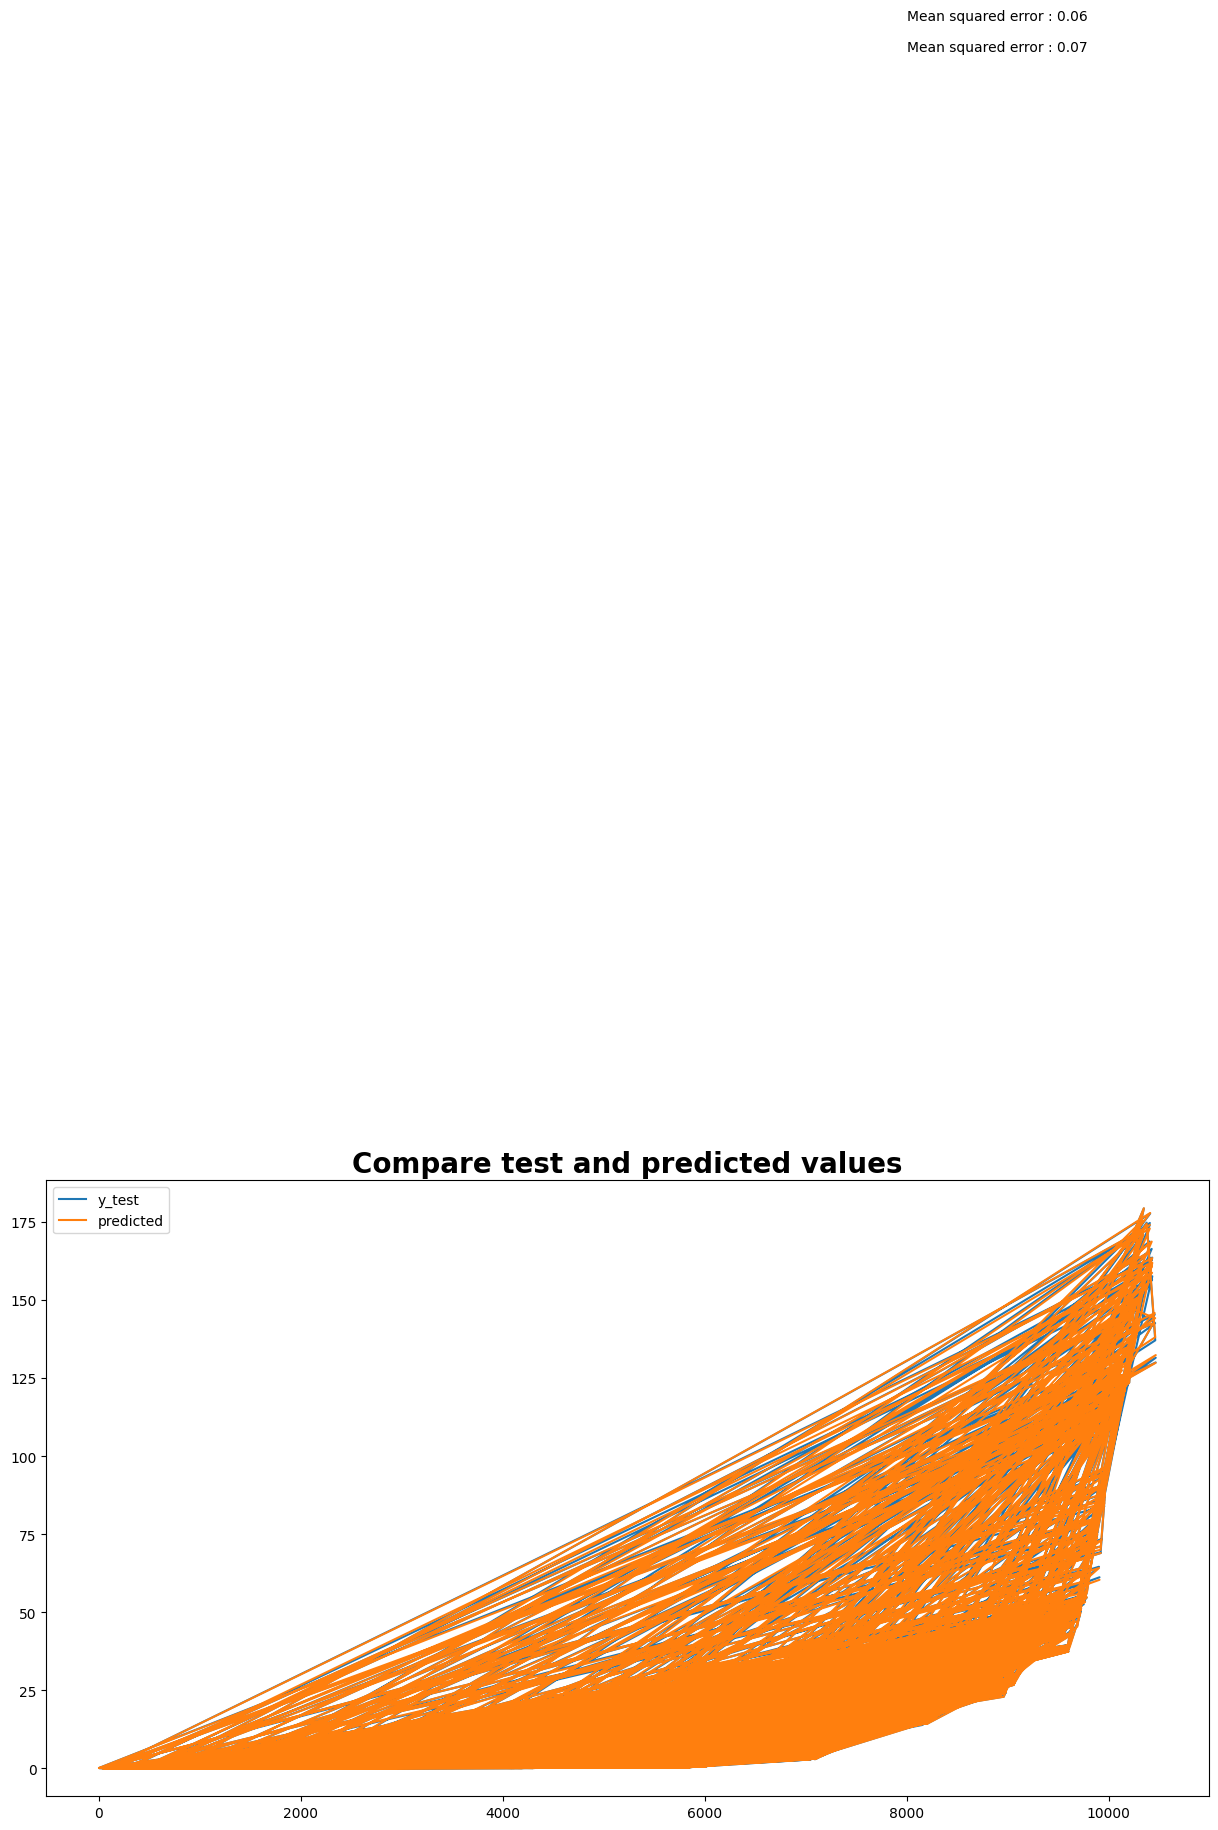

In [21]:
fig = plt.figure(figsize=(15,8))
p = pd.Series(pred,index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title('Compare test and predicted values', size = 20 , weight = 'bold')

plt.text(x=8000, y = 560 , s = 'Mean squared error : {}'.format(mse))
plt.text(x=8000, y = 550 , s = 'Mean squared error : {}'.format(mae))


# **Try with LSTM**

In [22]:
x = df['Close']

lenght = 100

training_set = x.iloc[:1000].values
test_set = x.iloc[1000:].values

# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))
test_set_scaled = sc.transform(test_set.reshape(-1,1))

print(training_set_scaled.shape)
print(test_set_scaled.shape)

(1000, 1)
(9468, 1)


In [23]:
x_train = []
y_train = []

for i in range(lenght , len(training_set)):
  x_train.append(training_set_scaled[i-lenght:i,0])
  y_train.append(training_set_scaled[i,0])
  print(i-lenght,'i-1',i-1,'i',i)

0 i-1 99 i 100
1 i-1 100 i 101
2 i-1 101 i 102
3 i-1 102 i 103
4 i-1 103 i 104
5 i-1 104 i 105
6 i-1 105 i 106
7 i-1 106 i 107
8 i-1 107 i 108
9 i-1 108 i 109
10 i-1 109 i 110
11 i-1 110 i 111
12 i-1 111 i 112
13 i-1 112 i 113
14 i-1 113 i 114
15 i-1 114 i 115
16 i-1 115 i 116
17 i-1 116 i 117
18 i-1 117 i 118
19 i-1 118 i 119
20 i-1 119 i 120
21 i-1 120 i 121
22 i-1 121 i 122
23 i-1 122 i 123
24 i-1 123 i 124
25 i-1 124 i 125
26 i-1 125 i 126
27 i-1 126 i 127
28 i-1 127 i 128
29 i-1 128 i 129
30 i-1 129 i 130
31 i-1 130 i 131
32 i-1 131 i 132
33 i-1 132 i 133
34 i-1 133 i 134
35 i-1 134 i 135
36 i-1 135 i 136
37 i-1 136 i 137
38 i-1 137 i 138
39 i-1 138 i 139
40 i-1 139 i 140
41 i-1 140 i 141
42 i-1 141 i 142
43 i-1 142 i 143
44 i-1 143 i 144
45 i-1 144 i 145
46 i-1 145 i 146
47 i-1 146 i 147
48 i-1 147 i 148
49 i-1 148 i 149
50 i-1 149 i 150
51 i-1 150 i 151
52 i-1 151 i 152
53 i-1 152 i 153
54 i-1 153 i 154
55 i-1 154 i 155
56 i-1 155 i 156
57 i-1 156 i 157
58 i-1 157 i 158
59 i-1 1

In [24]:
x_test = []
y_test = []

for i in range(lenght , len(training_set)):
  x_test.append(training_set_scaled[i-lenght:i,0])
  y_test.append(training_set_scaled[i,0])
  print(i-lenght,'i-1',i-1,'i',i)

0 i-1 99 i 100
1 i-1 100 i 101
2 i-1 101 i 102
3 i-1 102 i 103
4 i-1 103 i 104
5 i-1 104 i 105
6 i-1 105 i 106
7 i-1 106 i 107
8 i-1 107 i 108
9 i-1 108 i 109
10 i-1 109 i 110
11 i-1 110 i 111
12 i-1 111 i 112
13 i-1 112 i 113
14 i-1 113 i 114
15 i-1 114 i 115
16 i-1 115 i 116
17 i-1 116 i 117
18 i-1 117 i 118
19 i-1 118 i 119
20 i-1 119 i 120
21 i-1 120 i 121
22 i-1 121 i 122
23 i-1 122 i 123
24 i-1 123 i 124
25 i-1 124 i 125
26 i-1 125 i 126
27 i-1 126 i 127
28 i-1 127 i 128
29 i-1 128 i 129
30 i-1 129 i 130
31 i-1 130 i 131
32 i-1 131 i 132
33 i-1 132 i 133
34 i-1 133 i 134
35 i-1 134 i 135
36 i-1 135 i 136
37 i-1 136 i 137
38 i-1 137 i 138
39 i-1 138 i 139
40 i-1 139 i 140
41 i-1 140 i 141
42 i-1 141 i 142
43 i-1 142 i 143
44 i-1 143 i 144
45 i-1 144 i 145
46 i-1 145 i 146
47 i-1 146 i 147
48 i-1 147 i 148
49 i-1 148 i 149
50 i-1 149 i 150
51 i-1 150 i 151
52 i-1 151 i 152
53 i-1 152 i 153
54 i-1 153 i 154
55 i-1 154 i 155
56 i-1 155 i 156
57 i-1 156 i 157
58 i-1 157 i 158
59 i-1 1

In [25]:
x_test , y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout

model = Sequential()
# Add first layer and dropout regularization
# Convert x_train to a NumPy array and get its shape.
x_train = np.array(x_train) # Moved this line up

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# add output layer
model.add(Dense(units=1))

#Compiling the RNN

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np

# Convert x_train and x_test to NumPy arrays and reshape to 3D (samples, timesteps, features)
x_train = np.array(x_train).reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1], 1))

# Ensure y_train and y_test are NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize the model
model = Sequential()

# Add LSTM layers and Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [29]:

# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0593 - val_loss: 0.0067
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039 - val_loss: 0.0022
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

<Axes: >

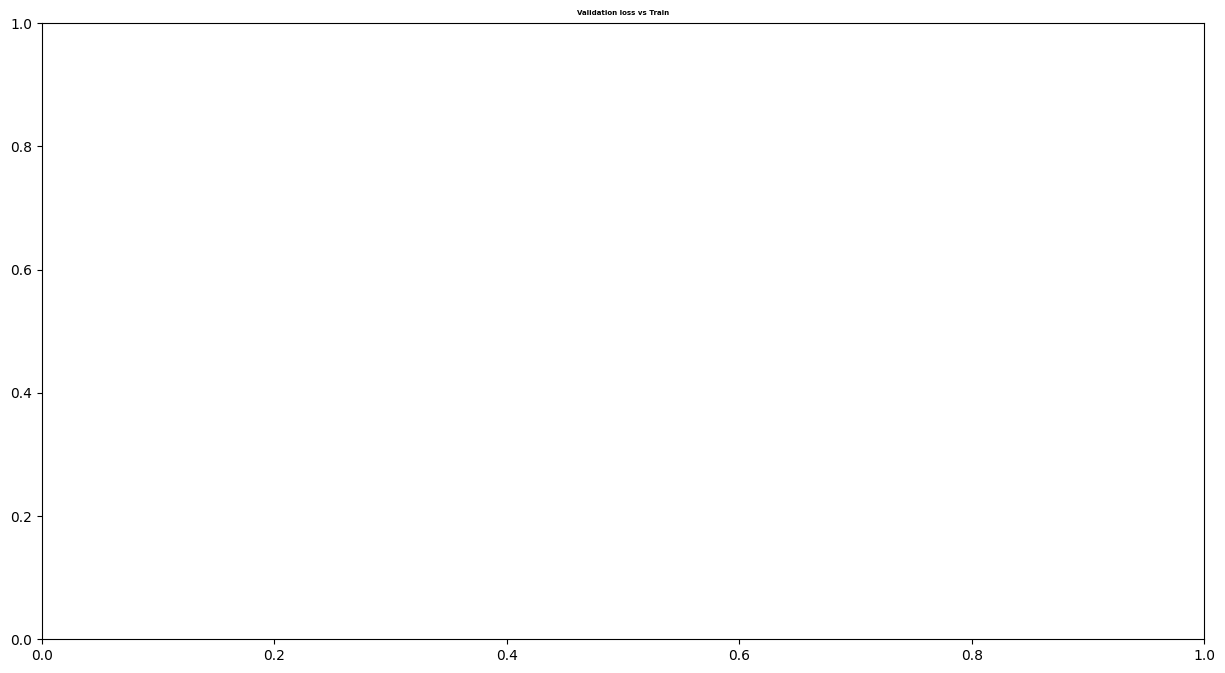

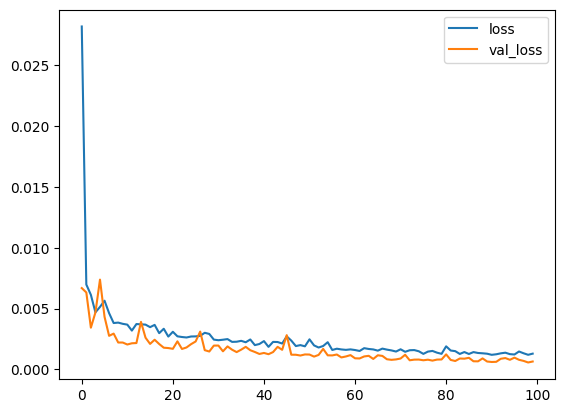

In [31]:
loss = pd.DataFrame(model.history.history)
fig = plt.figure(figsize=(15,8))
plt.title("Validation loss vs Train", size = 5 , weight = 'bold')
loss.plot()

In [32]:
pred= model.predict(x_test)
test = pd.DataFrame(columns = ['test','pred'])
test['test'] = y_test
test['pred'] = pred
test

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


,test,pred
0,0.323672,0.336005
1,0.328503,0.332467
2,0.316426,0.333930
3,0.316426,0.331615
4,0.314011,0.328060
...,...,...
895,0.236717,0.250926
896,0.210144,0.248733
897,0.224636,0.235410
898,0.234302,0.227380


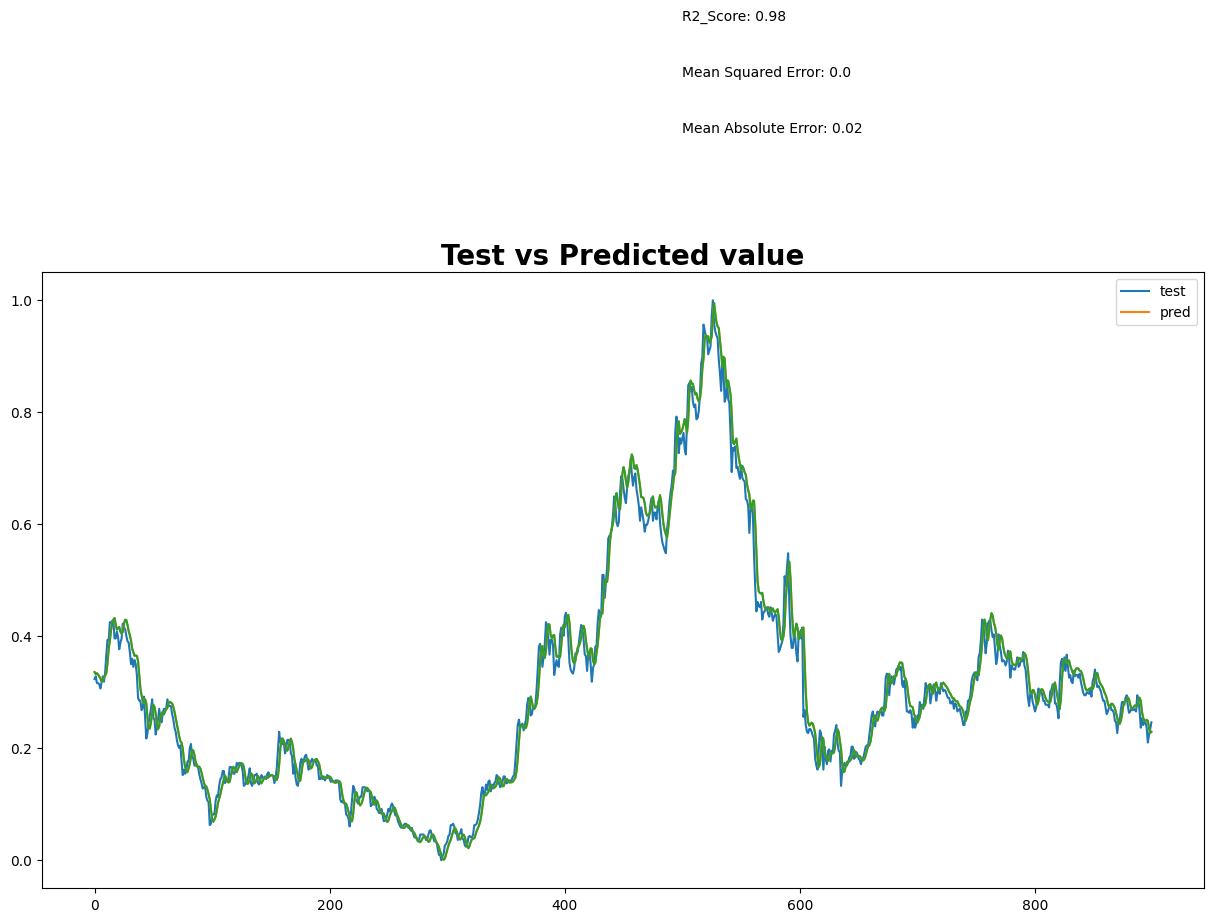

In [37]:
fig = plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.plot(pred)  # Added to plot predictions as well
plt.legend(['test', 'pred'])

r2 = np.round(r2_score(y_test, pred), 2)
mse = np.round(mean_squared_error(y_test, pred), 2)
mae = np.round(mean_absolute_error(y_test, pred), 2)

# Corrected the format syntax by replacing curly braces with parentheses
plt.text(x=500, y=1.5, s='R2_Score: {}'.format(r2))
plt.text(x=500, y=1.4, s='Mean Squared Error: {}'.format(mse))
plt.text(x=500, y=1.3, s='Mean Absolute Error: {}'.format(mae))

plt.show()
